In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

df = pd.read_csv('C:\\Users\\vlad-\Desktop\study_performance.csv')
print(df.isnull().any().sum())
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.shape[0])
df.head(3)

0
0
1000


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


В датасете 1000 строк и 8 колонок. Пропусков и дубликатов нет. В датасете 3 переменные в целочисленном выражении и 5 категорийныйх характеристик

In [2]:
print('Gender types:', df['gender'].unique())
print('Race/ethnicity:', df['race_ethnicity'].unique())
print('Parental level of education:', df['parental_level_of_education'].unique())
print('Categories for lunch:', df['lunch'].unique())
print('Test preparation categories:', df['test_preparation_course'].unique())

Gender types: ['female' 'male']
Race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories for lunch: ['standard' 'free/reduced']
Test preparation categories: ['none' 'completed']


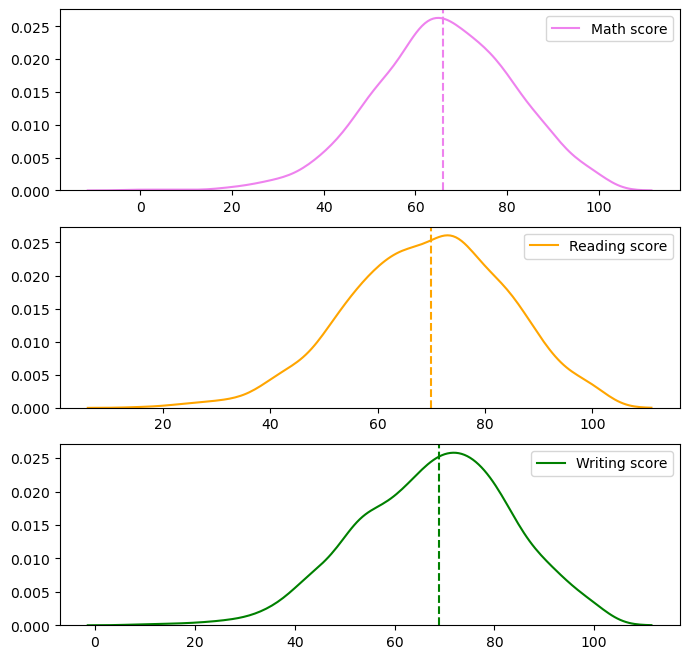

In [3]:
data_m = df['math_score']
data_r = df['reading_score']
data_w = df['writing_score']


fig, axs = plt.subplots(3, 1, figsize=(8, 8))

# График для Math score
sns.kdeplot(data_m, ax=axs[0], label='Math score', color='violet')
axs[0].axvline(data_m.median(), color='violet', linestyle='--')
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].legend()

# График для Reading score
sns.kdeplot(data_r, ax=axs[1], label='Reading score', color='orange')
axs[1].axvline(data_r.median(), color='orange', linestyle='--')
axs[1].set_xlabel('')
axs[1].set_ylabel('')
axs[1].legend()

# График для Writing score
sns.kdeplot(data_w, ax=axs[2], label='Writing score', color='green')
axs[2].axvline(data_w.median(), color='green', linestyle='--')
axs[2].set_xlabel('')
axs[2].set_ylabel('')
axs[2].legend()

plt.show()


Медианные значения набранных по экзаменам результатов очень близки, распределения очень похожи

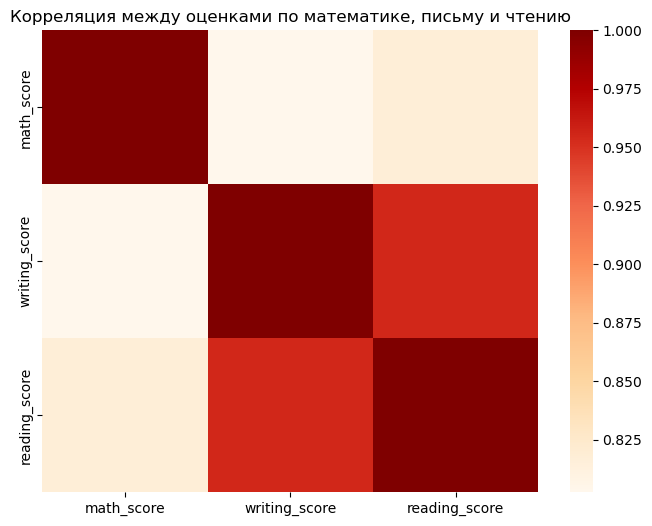

In [4]:
df_scores = df[['math_score', 'writing_score', 'reading_score']]
correlation = df_scores.corr()

# Создайте тепловую карту
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=False, cmap='OrRd')
plt.title('Корреляция между оценками по математике, письму и чтению')
plt.show()

Корреляция результатов высокая, но математика коррелирует с другими экзаменами слабее

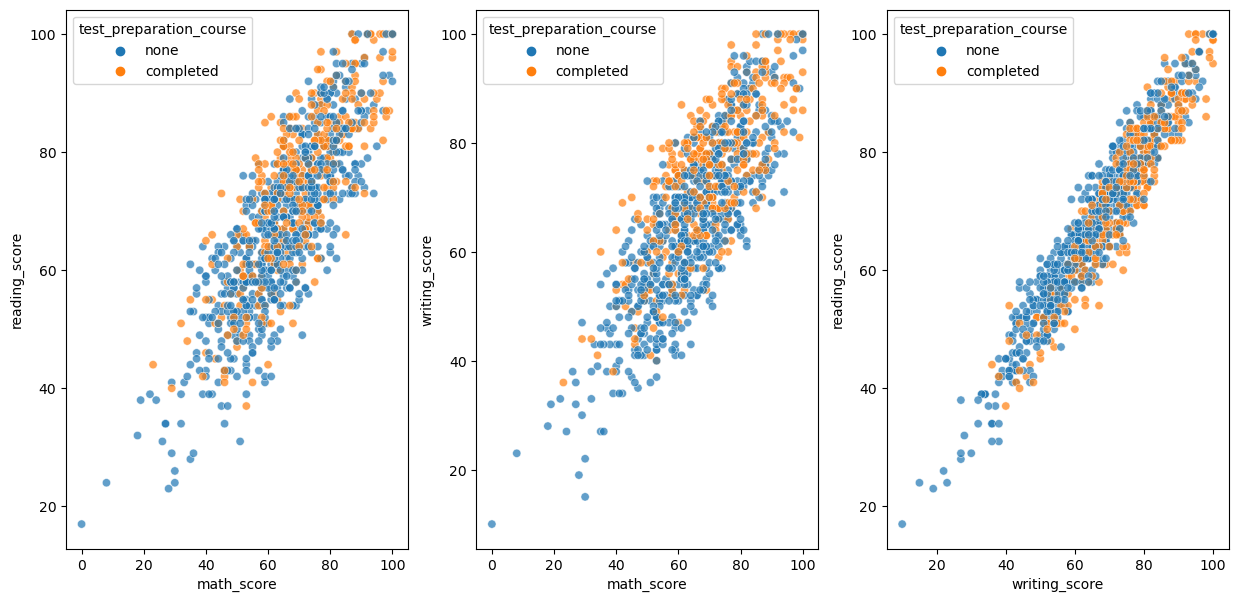

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(15, 7))

sns.scatterplot(data=df, x='math_score', y='reading_score', hue='test_preparation_course', alpha=0.7, ax=ax[0])
sns.scatterplot(data=df, x='math_score', y='writing_score', hue='test_preparation_course', alpha=0.7, ax=ax[1])
sns.scatterplot(data=df, x='writing_score', y='reading_score', hue='test_preparation_course', alpha=0.7, ax=ax[2])

plt.show()

Диаграммы рассеяния наглядно показывают высокую корреляцию экзамена по чтению и письму. Также видно, что разброс на графиках с результатами по математике выше, то есть и корреляция слабее. Также можно отметить, что в целом при подготовке к экзаменам в среднем студенты сдают их лучше 

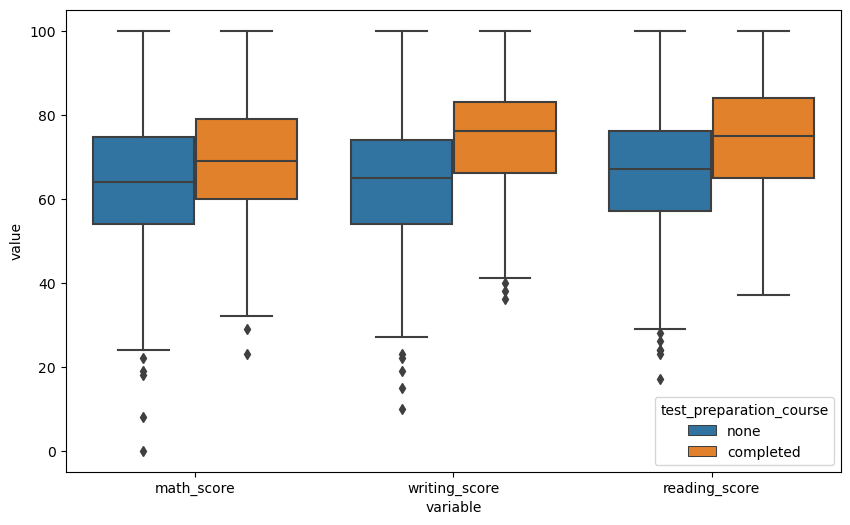

In [6]:
melted_df = pd.melt(df, id_vars='test_preparation_course', value_vars=['math_score', 'writing_score', 'reading_score'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=melted_df, x='variable', y='value', hue='test_preparation_course')
plt.show()

Ящики с усами также подверждают, что в среднем подготовка чуть повышает шансы лучше сдать экзамен

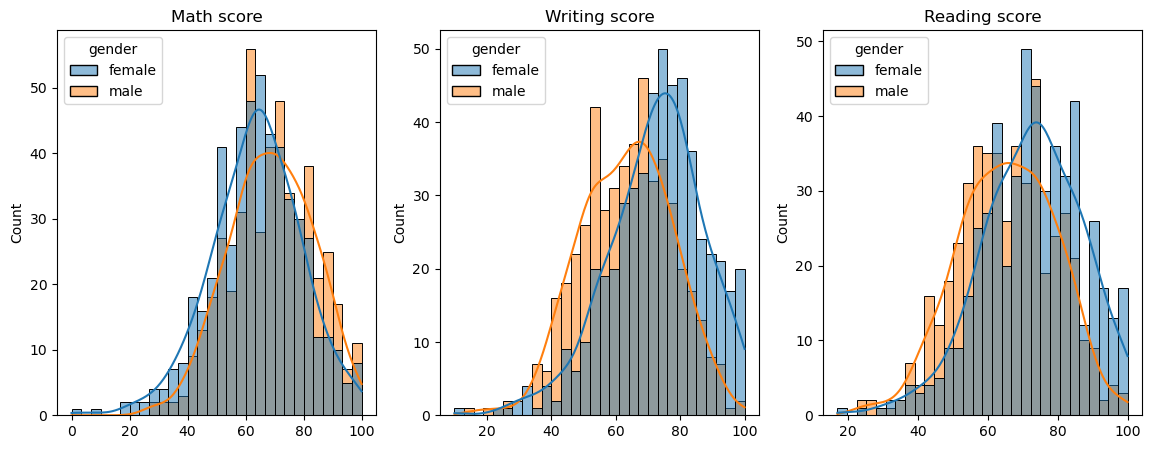

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(14, 5))
sns.histplot(data=df, x='math_score', bins=30, kde=True, hue='gender', ax=axs[0])
axs[0].set_title('Math score')
axs[0].set_xlabel('')
sns.histplot(data=df, x='writing_score', bins=30, kde=True, hue='gender', ax=axs[1])
axs[1].set_title('Writing score')
axs[1].set_xlabel('')
sns.histplot(data=df, x='reading_score', bins=30, kde=True, hue='gender', ax=axs[2])
axs[2].set_title('Reading score')
axs[2].set_xlabel('')
plt.show()

В среднем студенты сдают математику немного лучше студенток, но уступают им в письме и чтении

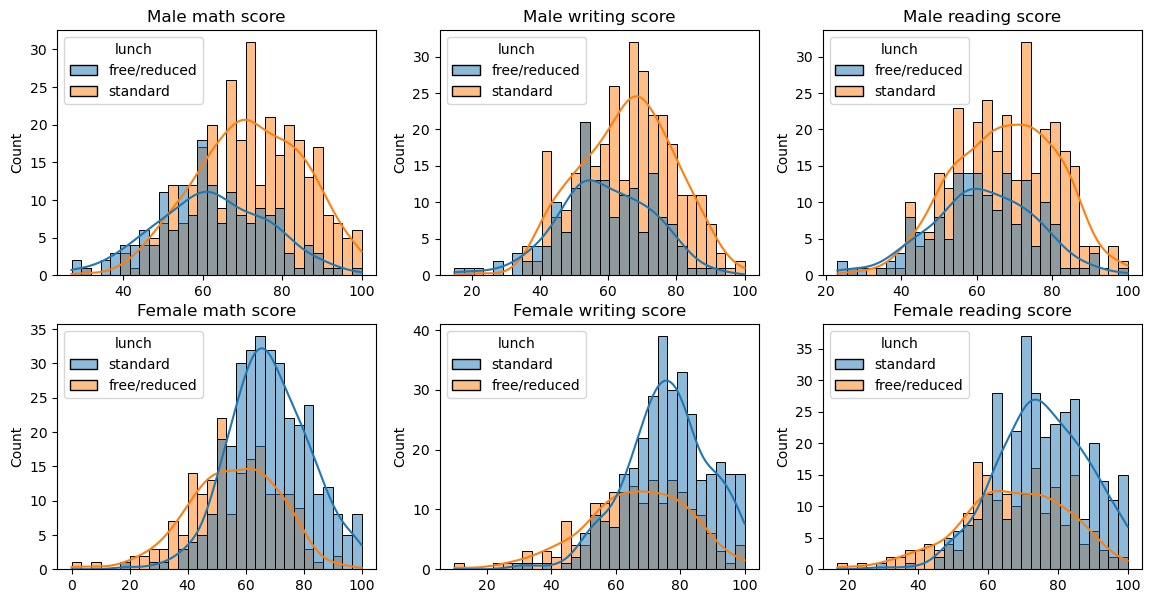

In [8]:
fig, axs = plt.subplots(2, 3, figsize=(14, 7))
sns.histplot(data=df[df.gender == 'male'], x='math_score', bins=30, kde=True, hue='lunch', ax=axs[0][0])
axs[0][0].set_title('Male math score')
axs[0][0].set_xlabel('')
sns.histplot(data=df[df.gender == 'male'], x='writing_score', bins=30, kde=True, hue='lunch', ax=axs[0][1])
axs[0][1].set_title('Male writing score')
axs[0][1].set_xlabel('')
sns.histplot(data=df[df.gender == 'male'], x='reading_score', bins=30, kde=True, hue='lunch', ax=axs[0][2])
axs[0][2].set_title('Male reading score')
axs[0][2].set_xlabel('')
sns.histplot(data=df[df.gender == 'female'], x='math_score', bins=30, kde=True, hue='lunch', ax=axs[1][0])
axs[1][0].set_title('Female math score')
axs[1][0].set_xlabel('')
sns.histplot(data=df[df.gender == 'female'], x='writing_score', bins=30, kde=True, hue='lunch', ax=axs[1][1])
axs[1][1].set_title('Female writing score')
axs[1][1].set_xlabel('')
sns.histplot(data=df[df.gender == 'female'], x='reading_score', bins=30, kde=True, hue='lunch', ax=axs[1][2])
axs[1][2].set_title('Female reading score')
axs[1][2].set_xlabel('')

plt.show()

В среднем обед также улучшает результаты учащихся

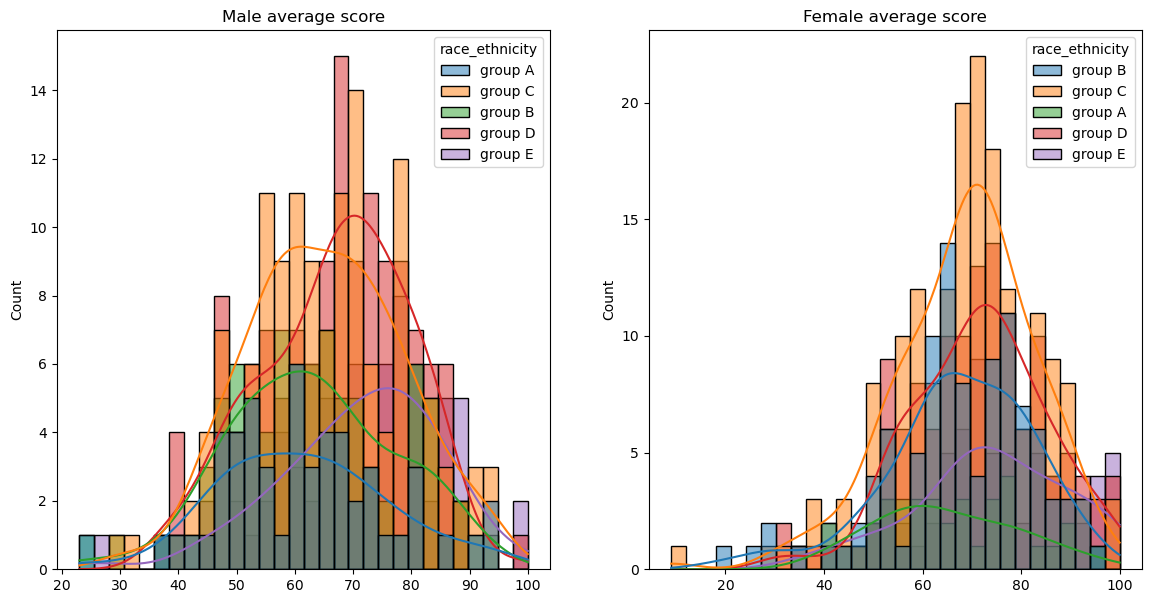

In [9]:
df['average'] = (df['math_score'] + df['writing_score'] + df['reading_score']) / 3
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
sns.histplot(data=df[df.gender == 'male'], x='average', bins=30, kde=True, hue='race_ethnicity', ax=axs[0])
sns.histplot(data=df[df.gender == 'female'], x='average', bins=30, kde=True, hue='race_ethnicity', ax=axs[1])
axs[0].set_title('Male average score')
axs[1].set_title('Female average score')
axs[0].set_xlabel('')
axs[1].set_xlabel('')
plt.show()


У мужчин разброс результатов по расовым/этническим группам чуть сильнее, когда как у студенток такой разницы практически нет, но выделяется группа A. 